In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_excel('data/nov_2020_rejects.xlsx')

In [51]:
df.head()

,Unnamed: 0,DLCOUNTYCODE,JURISDCODE,COUNTY,JURISDICTION,BALLOTS ISSUED,BALLOTS TABULATED,NO SIGNATURE,SIGNATURE NO MATCH,BALLOT LATE,VOTER SENTENCED,VOTER MOVED,VOTER CANCELLED,VOTER REJECTED,VOTER DECEASED,VOTED AT POLLS,NO BALLOT IN ENVELOPE,ID NOT CONFIRMED,TOTAL BALLOTS REJECTED
0,1.0,1.0,1040.0,ALCONA COUNTY,ALCONA TOWNSHIP,460,427,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,2.0,1.0,12460.0,ALCONA COUNTY,CALEDONIA TOWNSHIP,369,330,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3.0,1.0,19320.0,ALCONA COUNTY,CURTIS TOWNSHIP,389,338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,4.0,1.0,34820.0,ALCONA COUNTY,GREENBUSH TOWNSHIP,437,395,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,4
4,5.0,1.0,35740.0,ALCONA COUNTY,GUSTIN TOWNSHIP,178,167,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [4]:
df.shape

(1521, 19)

In [5]:
list(df.columns)

['Unnamed: 0',
 'DLCOUNTYCODE',
 'JURISDCODE',
 'COUNTY',
 'JURISDICTION',
 'BALLOTS ISSUED',
 'BALLOTS TABULATED',
 'NO SIGNATURE',
 'SIGNATURE NO MATCH',
 'BALLOT LATE',
 'VOTER SENTENCED',
 'VOTER MOVED',
 'VOTER CANCELLED',
 'VOTER REJECTED',
 'VOTER DECEASED',
 'VOTED AT POLLS',
 'NO BALLOT IN ENVELOPE',
 'ID NOT CONFIRMED',
 'TOTAL BALLOTS REJECTED']

In [6]:
jurisdictions = pd.read_excel('data/focus jurisdictions.xlsx')

In [7]:
list(jurisdictions.columns)

['jurisdiction ']

In [8]:
jurisdictions.shape

(54, 1)

In [9]:
jurisdictions.isna().sum()

jurisdiction     0
dtype: int64

In [10]:
new_juris = jurisdictions['jurisdiction '].str.split("(", n=1, expand=True)

In [11]:
new_juris = new_juris.rename({0: "jurisdiction"}, axis='columns')

In [12]:
focus_jurisdictions = new_juris[['jurisdiction']]

In [13]:
#Make a series with focus jurisdictions in all caps 
focus_jurisdictions = focus_jurisdictions['jurisdiction'].str.upper().str.rstrip()

In [14]:
focus_jurisdictions = focus_jurisdictions.to_list()

In [15]:
focus_jurisdictions

['ALBION CITY',
 'ALLENDALE TOWNSHIP',
 'ANN ARBOR CITY',
 'BATTLE CREEK CITY',
 'BAY CITY CITY',
 'BENTON CHARTER TOWNSHIP',
 'BENTON HARBOR CITY',
 'BUENA VISTA CHARTER TOWNSHIP',
 'CANTON TOWNSHIP',
 'CENTER LINE CITY',
 'CLINTON TOWNSHIP',
 'CLYDE TOWNSHIP',
 'COVERT TOWNSHIP',
 'DEARBORN CITY',
 'DEARBORN HEIGHTS CITY',
 'DETROIT CITY',
 'EASTPOINTE CITY',
 'EAST LANSING CITY',
 'ECORSE CITY',
 'FENNVILLE',
 'FLINT CITY',
 'FLINT TOWNSHIP',
 'GRAND RAPIDS CITY',
 'HAMTRAMCK CITY',
 'HARPER WOODS CITY',
 'HARRIS TOWNSHIP',
 'HIGHLAND PARK CITY',
 'HOLLAND CITY',
 'HOLLAND TOWNSHIP',
 'INKSTER',
 'KALAMAZOO CITY',
 'KENTWOOD CITY',
 'LANSING CITY',
 'LIVONIA',
 'MARQUETTE CITY',
 'MOUNT PLEASANT CITY',
 'MUSKEGON CITY',
 'MUSKEGON HEIGHTS CITY',
 'NOVI CITY',
 'OAK PARK CITY',
 'PONTIAC CITY',
 'PORT HURON CITY',
 'REDFORD TOWNSHIP',
 'RIVER ROUGE CITY',
 'ROYAL OAK TOWNSHIP',
 'SAGINAW CITY',
 'ST. CLAIR SHORES CITY',
 'STERLING HEIGHTS CITY',
 'SOUTHFIELD CITY',
 'TROY CITY',
 'WA

In [16]:
focused_df = df[df['JURISDICTION'].isin(focus_jurisdictions)]

In [17]:
focused_df.shape

(54, 19)

In [18]:
df2 = focused_df.drop(columns=['Unnamed: 0','DLCOUNTYCODE', 'JURISDCODE'], axis=1).reset_index(drop=True)

In [19]:
df2

,COUNTY,JURISDICTION,BALLOTS ISSUED,BALLOTS TABULATED,NO SIGNATURE,SIGNATURE NO MATCH,BALLOT LATE,VOTER SENTENCED,VOTER MOVED,VOTER CANCELLED,VOTER REJECTED,VOTER DECEASED,VOTED AT POLLS,NO BALLOT IN ENVELOPE,ID NOT CONFIRMED,TOTAL BALLOTS REJECTED
0,ALLEGAN COUNTY,CLYDE TOWNSHIP,404,340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,BAY COUNTY,BAY CITY CITY,9412,8760,1.0,15.0,3.0,0.0,18.0,6.0,0.0,4.0,97.0,0.0,0.0,144
2,BERRIEN COUNTY,BENTON CHARTER TOWNSHIP,4457,4160,2.0,0.0,0.0,0.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,16
3,BERRIEN COUNTY,BENTON HARBOR CITY,2461,2153,4.0,3.0,2.0,0.0,11.0,0.0,0.0,1.0,60.0,1.0,0.0,82
4,CALHOUN COUNTY,ALBION CITY,1793,1618,0.0,2.0,1.0,0.0,8.0,0.0,0.0,3.0,0.0,0.0,0.0,14
5,CALHOUN COUNTY,BATTLE CREEK CITY,13636,12310,0.0,18.0,10.0,0.0,41.0,1.0,0.0,15.0,0.0,0.0,0.0,85
6,GENESEE COUNTY,FLINT CITY,22860,19821,40.0,25.0,36.0,0.0,56.0,0.0,0.0,24.0,1.0,0.0,0.0,182
7,GENESEE COUNTY,FLINT TOWNSHIP,11484,10417,18.0,0.0,8.0,0.0,51.0,4.0,0.0,15.0,0.0,5.0,0.0,101
8,INGHAM COUNTY,EAST LANSING CITY,12696,11587,4.0,1.0,31.0,0.0,189.0,2.0,0.0,7.0,0.0,0.0,0.0,234
9,INGHAM COUNTY,LANSING CITY,40151,36398,27.0,3.0,53.0,0.0,203.0,2.0,0.0,33.0,460.0,0.0,21.0,802


In [20]:
df2['OTHER'] = df2['VOTER MOVED'] + df2['VOTER DECEASED'] + df2['VOTED AT POLLS'] + df2['VOTER SENTENCED'] + df2['VOTER CANCELLED'] + df2['VOTER REJECTED']

In [21]:
df2['SIGNATURE ISSUES'] = df2['NO SIGNATURE'] + df2['SIGNATURE NO MATCH']

In [22]:
df2['REJECTED RATE'] = df2['TOTAL BALLOTS REJECTED']/df2['BALLOTS TABULATED']

In [23]:
df2['NO SIG RATE'] = df2['NO SIGNATURE']/df2['TOTAL BALLOTS REJECTED']

In [24]:
df2['ID NOT CONF RATE'] = df2['ID NOT CONFIRMED']/df2['TOTAL BALLOTS REJECTED']

In [25]:
df2['NO MATCH RATE'] = df2['SIGNATURE NO MATCH']/df2['TOTAL BALLOTS REJECTED']

In [26]:
df2['BALLOT LATE RATE'] = df2['BALLOT LATE']/df2['TOTAL BALLOTS REJECTED']

In [27]:
df2['ENV EMPTY RATE'] = df2['NO BALLOT IN ENVELOPE']/df2['TOTAL BALLOTS REJECTED']

In [28]:
sorted = df2.sort_values('TOTAL BALLOTS REJECTED', ascending = False)

In [29]:
clipped = sorted.loc[sorted['TOTAL BALLOTS REJECTED'] > 300]

In [30]:
clipped.shape

(14, 24)

In [31]:
clipped

,COUNTY,JURISDICTION,BALLOTS ISSUED,BALLOTS TABULATED,NO SIGNATURE,SIGNATURE NO MATCH,BALLOT LATE,VOTER SENTENCED,VOTER MOVED,VOTER CANCELLED,...,ID NOT CONFIRMED,TOTAL BALLOTS REJECTED,OTHER,SIGNATURE ISSUES,REJECTED RATE,NO SIG RATE,ID NOT CONF RATE,NO MATCH RATE,BALLOT LATE RATE,ENV EMPTY RATE
47,WAYNE COUNTY,DETROIT CITY,202230,174485,627.0,54.0,291.0,0.0,789.0,1.0,...,2.0,2507,1523.0,681.0,0.014368,0.250100,0.000798,0.021540,0.116075,0.003989
12,KENT COUNTY,GRAND RAPIDS CITY,65723,59188,15.0,0.0,49.0,0.0,425.0,17.0,...,0.0,2217,2153.0,15.0,0.037457,0.006766,0.000000,0.000000,0.022102,0.000000
19,MACOMB COUNTY,STERLING HEIGHTS CITY,44480,40664,55.0,125.0,79.0,0.0,149.0,3.0,...,0.0,1876,1606.0,180.0,0.046134,0.029318,0.000000,0.066631,0.042111,0.005864
41,WASHTENAW COUNTY,ANN ARBOR CITY,60541,56277,11.0,3.0,143.0,1.0,419.0,25.0,...,0.0,1583,1425.0,14.0,0.028129,0.006949,0.000000,0.001895,0.090335,0.000632
20,MACOMB COUNTY,WARREN CITY,42385,38412,55.0,58.0,45.0,0.0,133.0,6.0,...,0.0,1255,1096.0,113.0,0.032672,0.043825,0.000000,0.046215,0.035857,0.000797
11,KALAMAZOO COUNTY,KALAMAZOO CITY,23631,21236,18.0,8.0,27.0,0.0,169.0,29.0,...,0.0,839,786.0,26.0,0.039508,0.021454,0.000000,0.009535,0.032181,0.000000
9,INGHAM COUNTY,LANSING CITY,40151,36398,27.0,3.0,53.0,0.0,203.0,2.0,...,21.0,802,698.0,30.0,0.022034,0.033666,0.026185,0.003741,0.066085,0.000000
26,OAKLAND COUNTY,NOVI CITY,27737,25944,14.0,19.0,35.0,0.0,117.0,11.0,...,0.0,660,592.0,33.0,0.025439,0.021212,0.000000,0.028788,0.053030,0.000000
46,WAYNE COUNTY,DEARBORN HEIGHTS CITY,16731,14931,22.0,11.0,26.0,0.0,81.0,3.0,...,0.0,488,429.0,33.0,0.032684,0.045082,0.000000,0.022541,0.053279,0.000000
13,KENT COUNTY,KENTWOOD CITY,18626,17058,19.0,21.0,19.0,0.0,66.0,0.0,...,5.0,457,392.0,40.0,0.026791,0.041575,0.010941,0.045952,0.041575,0.002188


In [32]:
list(clipped.columns)

['COUNTY',
 'JURISDICTION',
 'BALLOTS ISSUED',
 'BALLOTS TABULATED',
 'NO SIGNATURE',
 'SIGNATURE NO MATCH',
 'BALLOT LATE',
 'VOTER SENTENCED',
 'VOTER MOVED',
 'VOTER CANCELLED',
 'VOTER REJECTED',
 'VOTER DECEASED',
 'VOTED AT POLLS',
 'NO BALLOT IN ENVELOPE',
 'ID NOT CONFIRMED',
 'TOTAL BALLOTS REJECTED',
 'OTHER',
 'SIGNATURE ISSUES',
 'REJECTED RATE',
 'NO SIG RATE',
 'ID NOT CONF RATE',
 'NO MATCH RATE',
 'BALLOT LATE RATE',
 'ENV EMPTY RATE']

In [33]:
chart1 = clipped[['JURISDICTION','TOTAL BALLOTS REJECTED', 'SIGNATURE ISSUES','BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED','OTHER']]

In [34]:
chart1 = chart1.set_index('JURISDICTION')

In [88]:
#Signature issues = either the ballot wasn't signed or the signature did not match
chart1

,TOTAL BALLOTS REJECTED,SIGNATURE ISSUES,BALLOT LATE,NO BALLOT IN ENVELOPE,ID NOT CONFIRMED,OTHER
JURISDICTION,,,,,,
DETROIT CITY,2507,681.0,291.0,10.0,2.0,1523.0
GRAND RAPIDS CITY,2217,15.0,49.0,0.0,0.0,2153.0
STERLING HEIGHTS CITY,1876,180.0,79.0,11.0,0.0,1606.0
ANN ARBOR CITY,1583,14.0,143.0,1.0,0.0,1425.0
WARREN CITY,1255,113.0,45.0,1.0,0.0,1096.0
KALAMAZOO CITY,839,26.0,27.0,0.0,0.0,786.0
LANSING CITY,802,30.0,53.0,0.0,21.0,698.0
NOVI CITY,660,33.0,35.0,0.0,0.0,592.0
DEARBORN HEIGHTS CITY,488,33.0,26.0,0.0,0.0,429.0


In [35]:
barchart1 = chart1.loc[chart1['TOTAL BALLOTS REJECTED'] > 800]

In [36]:
#Areas where total ballots rejected was greater than 800
barchart1

,TOTAL BALLOTS REJECTED,SIGNATURE ISSUES,BALLOT LATE,NO BALLOT IN ENVELOPE,ID NOT CONFIRMED,OTHER
JURISDICTION,,,,,,
DETROIT CITY,2507,681.0,291.0,10.0,2.0,1523.0
GRAND RAPIDS CITY,2217,15.0,49.0,0.0,0.0,2153.0
STERLING HEIGHTS CITY,1876,180.0,79.0,11.0,0.0,1606.0
ANN ARBOR CITY,1583,14.0,143.0,1.0,0.0,1425.0
WARREN CITY,1255,113.0,45.0,1.0,0.0,1096.0
KALAMAZOO CITY,839,26.0,27.0,0.0,0.0,786.0
LANSING CITY,802,30.0,53.0,0.0,21.0,698.0


Code for the below plot courtesy of [Thiago Carvalho](https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7).

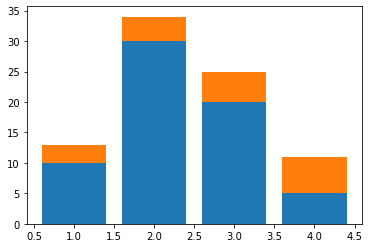

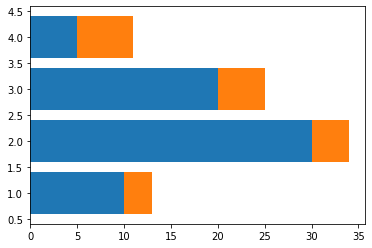

In [73]:
plt.bar([1,2,3,4], [10,30,20,5])
plt.bar([1,2,3,4], [3,4,5,6], bottom = [10,30,20,5])
plt.show()
plt.barh([1,2,3,4], [10,30,20,5])
plt.barh([1,2,3,4], [3,4,5,6], left = [10,30,20,5])
plt.show()

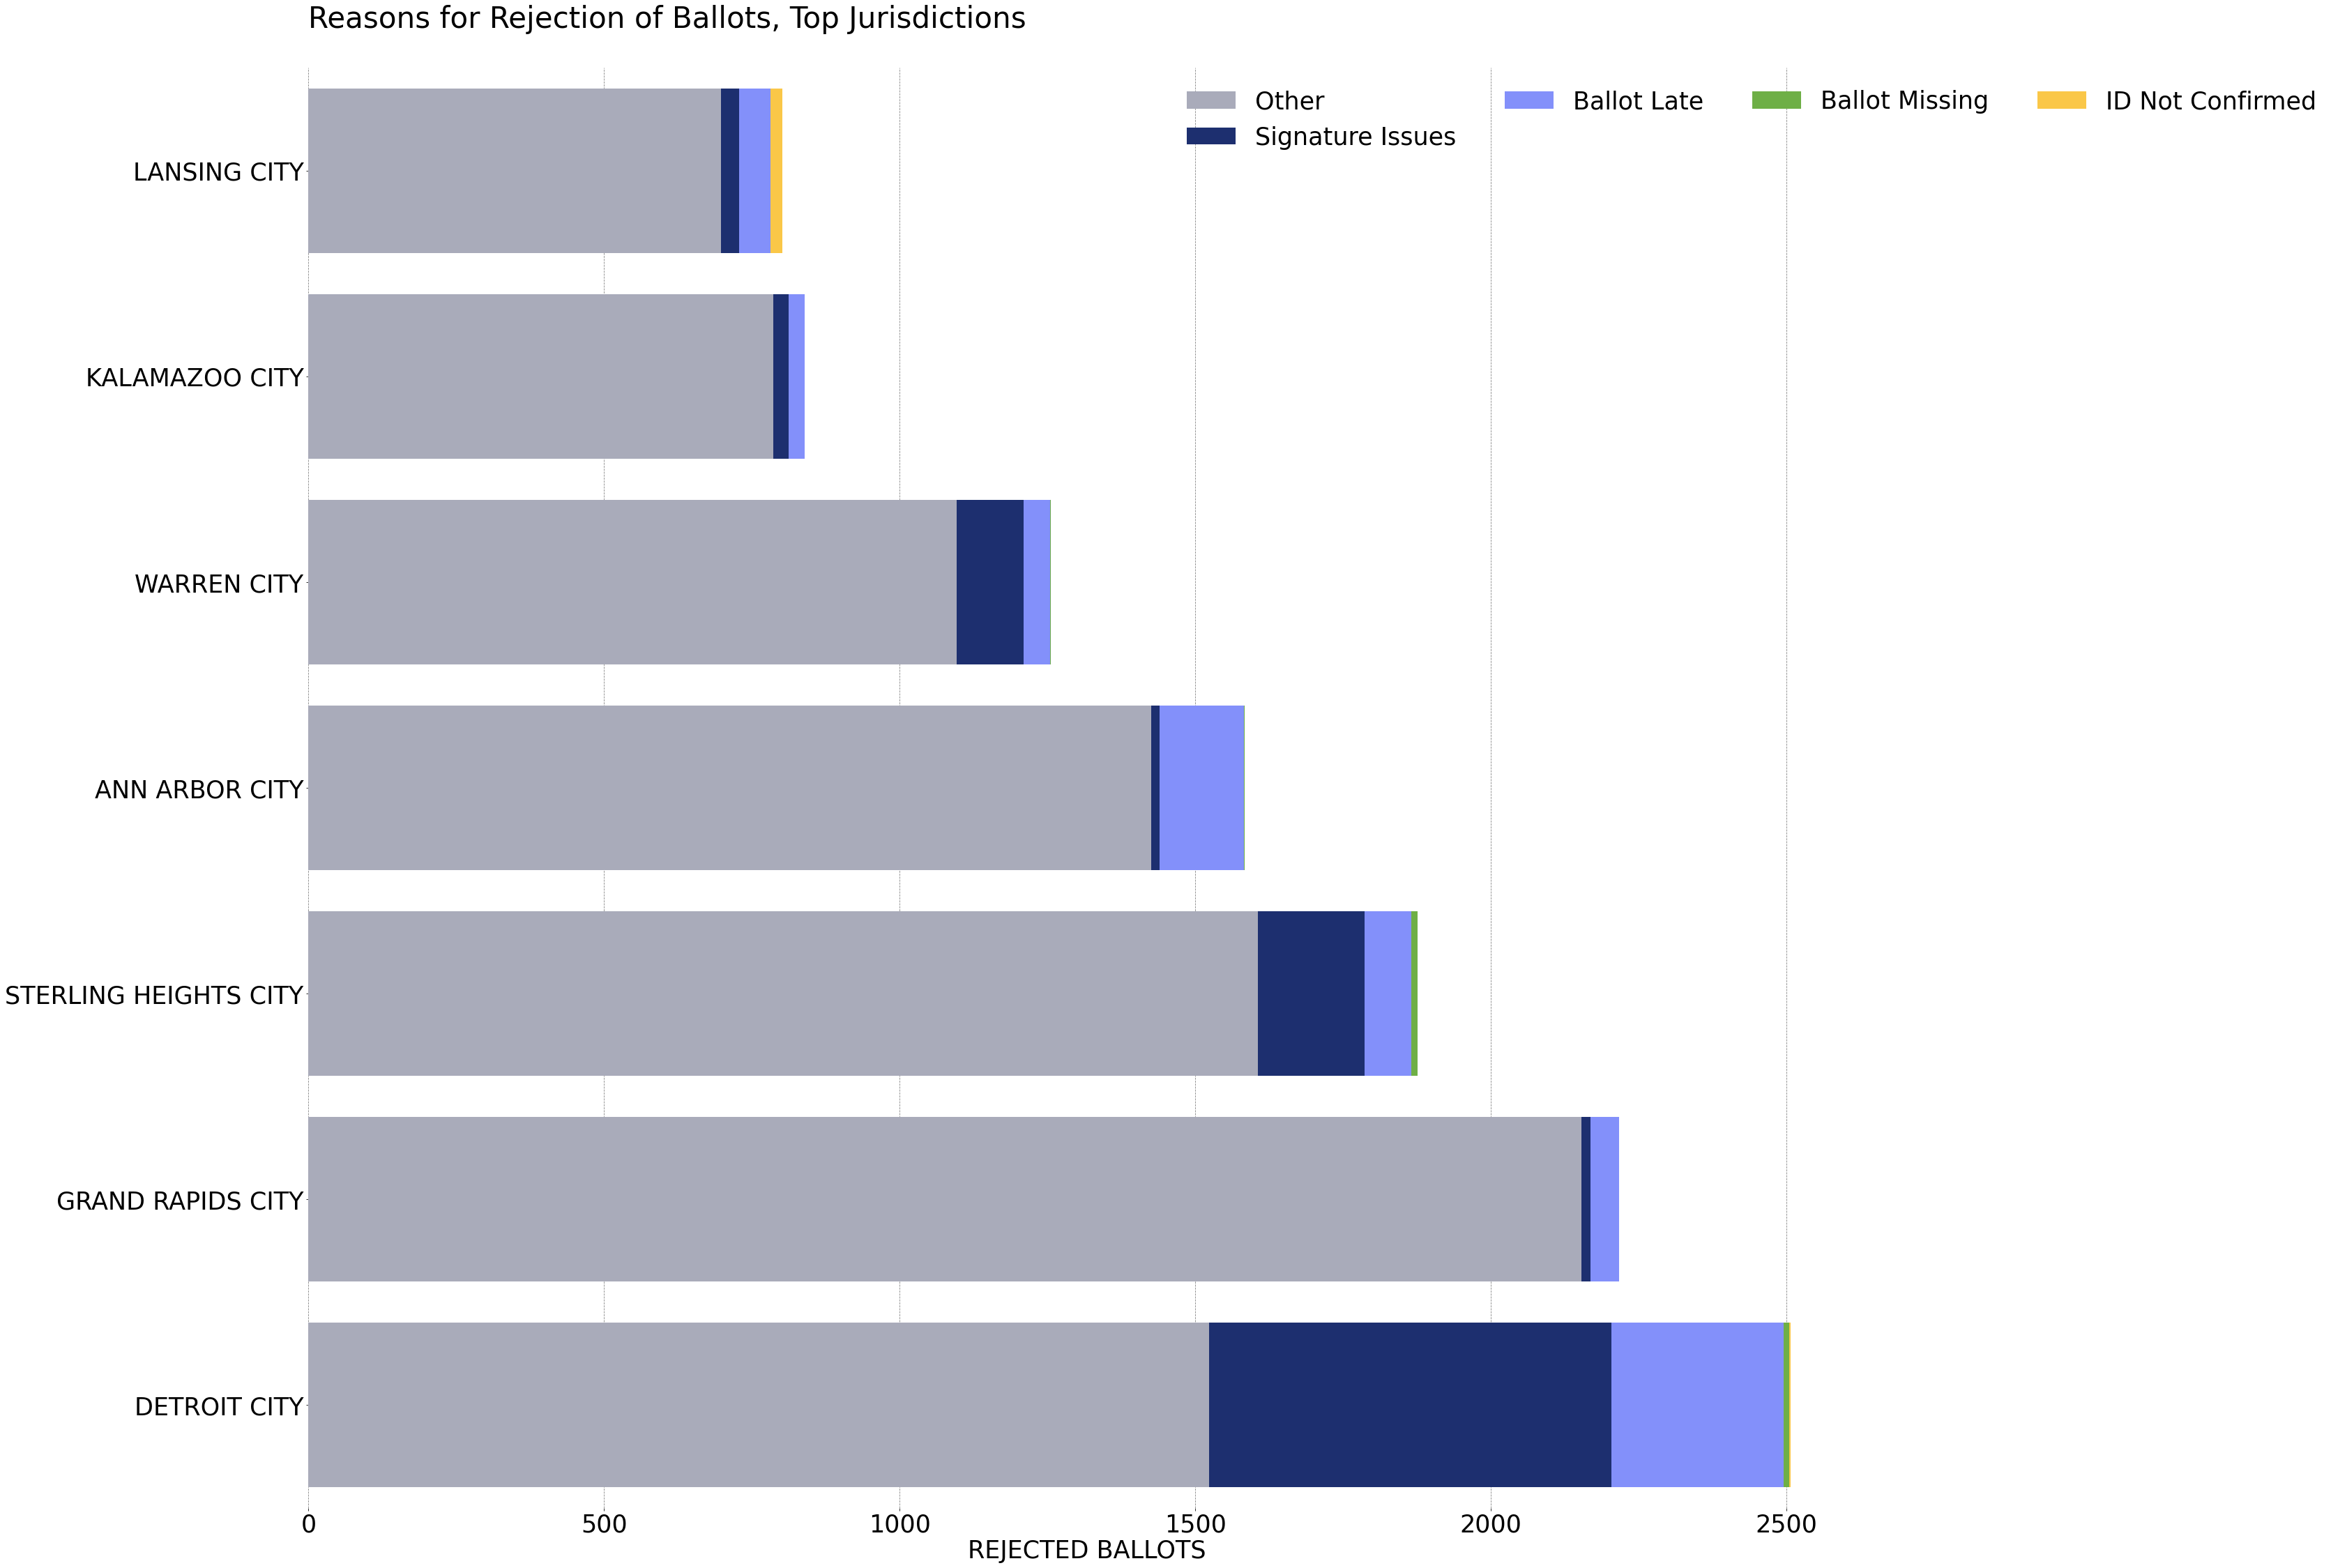

In [52]:
fields = ['OTHER','SIGNATURE ISSUES', 'BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED']
colors = ['#A9ABBA','#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['Other','Signature Issues','Ballot Late','Ballot Missing','ID Not Confirmed']

plt.rc('font', size=35) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(40,38))
#plot bars
left = len(barchart1) * [0]
for idx, name in enumerate(fields): 
    plt.barh(barchart1.index, barchart1[name], left=left, color=colors[idx])
    left = left + barchart1[name]
#title, legend, labels
plt.title('Reasons for Rejection of Ballots, Top Jurisdictions\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('REJECTED BALLOTS')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

In [43]:
#Areas where total ballots rejected was less than 800
barchart2 = chart1.loc[chart1['TOTAL BALLOTS REJECTED'] < 800]

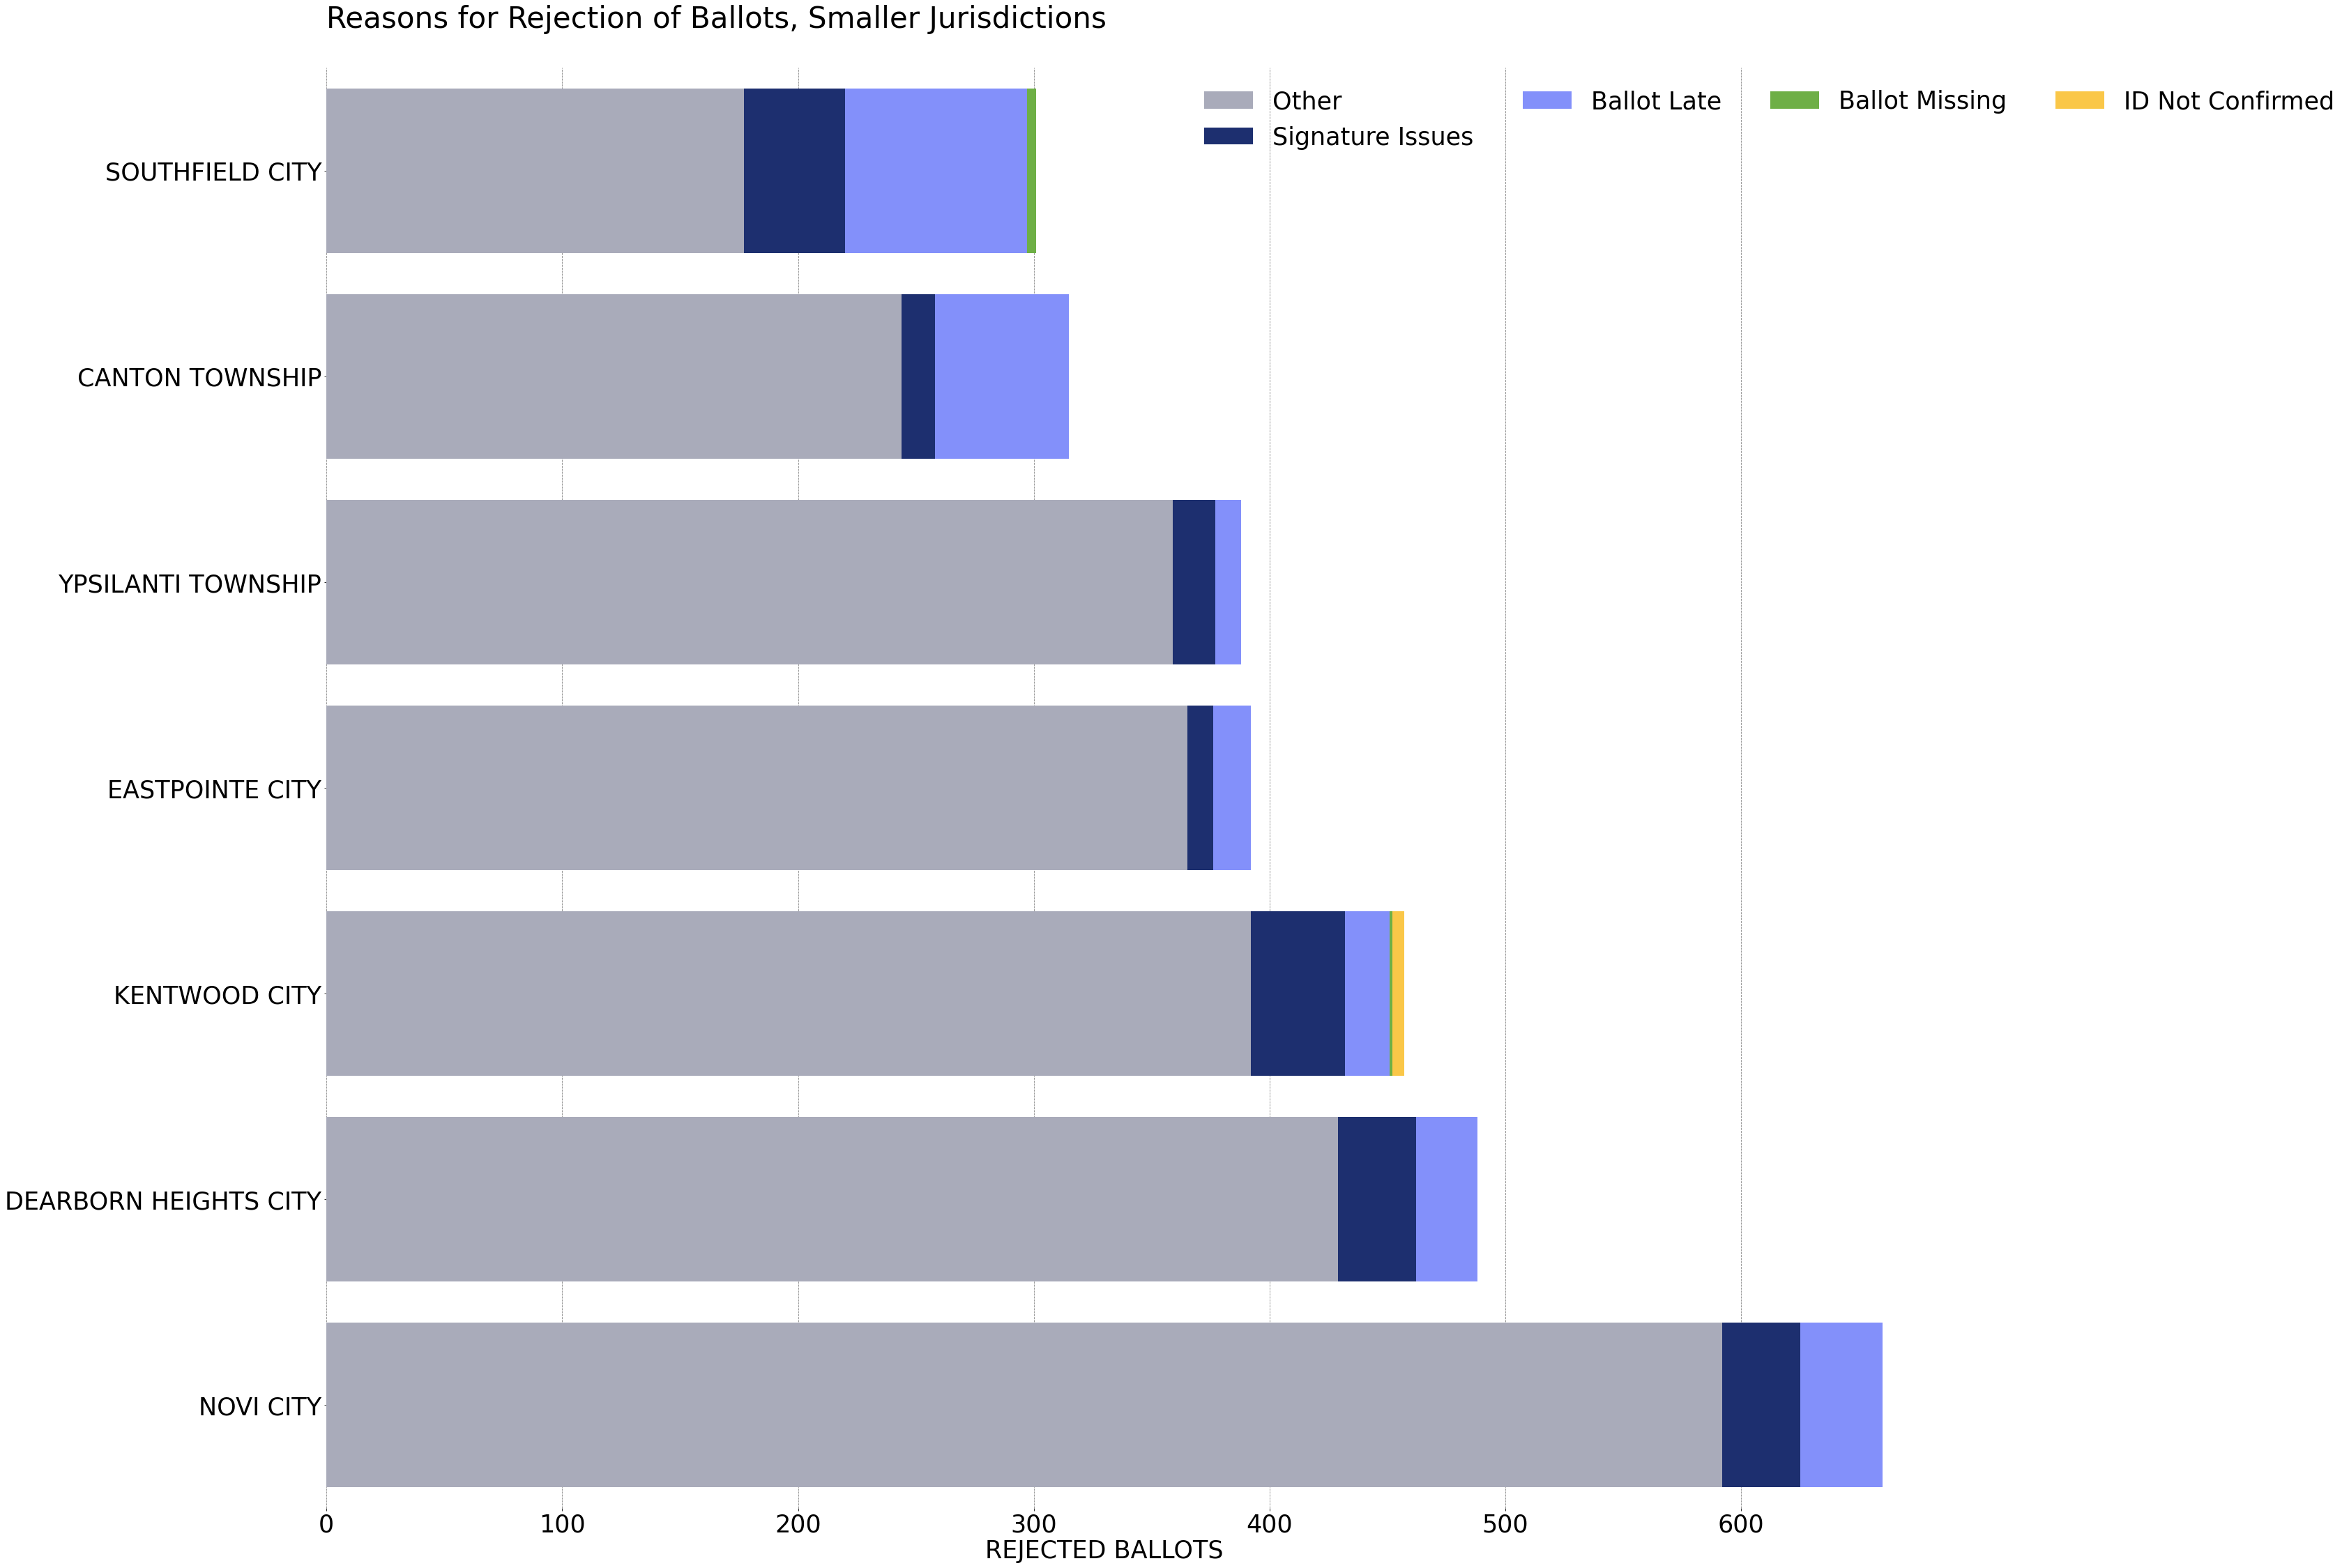

In [53]:
#figure and axis
fig, ax = plt.subplots(1, figsize=(40,38))
#plot bars
left = len(barchart1) * [0]
for idx, name in enumerate(fields): 
    plt.barh(barchart2.index, barchart2[name], left=left, color=colors[idx])
    left = left + barchart2[name]
#title, legend, labels
plt.title('Reasons for Rejection of Ballots, Smaller Jurisdictions\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('REJECTED BALLOTS')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

In [54]:
df2['OTHER RATE'] = df2['OTHER']/df2['TOTAL BALLOTS REJECTED'] 

In [61]:
df2['SIG ISSUE RATE'] = df2['SIGNATURE ISSUES']/df2['TOTAL BALLOTS REJECTED']

In [62]:
df2.head()

,COUNTY,JURISDICTION,BALLOTS ISSUED,BALLOTS TABULATED,NO SIGNATURE,SIGNATURE NO MATCH,BALLOT LATE,VOTER SENTENCED,VOTER MOVED,VOTER CANCELLED,...,OTHER,SIGNATURE ISSUES,REJECTED RATE,NO SIG RATE,ID NOT CONF RATE,NO MATCH RATE,BALLOT LATE RATE,ENV EMPTY RATE,OTHER RATE,SIG ISSUE RATE
0,ALLEGAN COUNTY,CLYDE TOWNSHIP,404,340,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.002941,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
1,BAY COUNTY,BAY CITY CITY,9412,8760,1.0,15.0,3.0,0.0,18.0,6.0,...,125.0,16.0,0.016438,0.006944,0.0,0.104167,0.020833,0.000000,0.868056,0.111111
2,BERRIEN COUNTY,BENTON CHARTER TOWNSHIP,4457,4160,2.0,0.0,0.0,0.0,13.0,0.0,...,14.0,2.0,0.003846,0.125000,0.0,0.000000,0.000000,0.000000,0.875000,0.125000
3,BERRIEN COUNTY,BENTON HARBOR CITY,2461,2153,4.0,3.0,2.0,0.0,11.0,0.0,...,72.0,7.0,0.038086,0.048780,0.0,0.036585,0.024390,0.012195,0.878049,0.085366
4,CALHOUN COUNTY,ALBION CITY,1793,1618,0.0,2.0,1.0,0.0,8.0,0.0,...,11.0,2.0,0.008653,0.000000,0.0,0.142857,0.071429,0.000000,0.785714,0.142857


In [63]:
sorted_rate = df2.sort_values(by='REJECTED RATE', ascending=False)

In [64]:
sorted_rate.head(10)

,COUNTY,JURISDICTION,BALLOTS ISSUED,BALLOTS TABULATED,NO SIGNATURE,SIGNATURE NO MATCH,BALLOT LATE,VOTER SENTENCED,VOTER MOVED,VOTER CANCELLED,...,OTHER,SIGNATURE ISSUES,REJECTED RATE,NO SIG RATE,ID NOT CONF RATE,NO MATCH RATE,BALLOT LATE RATE,ENV EMPTY RATE,OTHER RATE,SIG ISSUE RATE
19,MACOMB COUNTY,STERLING HEIGHTS CITY,44480,40664,55.0,125.0,79.0,0.0,149.0,3.0,...,1606.0,180.0,0.046134,0.029318,0.000000,0.066631,0.042111,0.005864,0.856077,0.095949
11,KALAMAZOO COUNTY,KALAMAZOO CITY,23631,21236,18.0,8.0,27.0,0.0,169.0,29.0,...,786.0,26.0,0.039508,0.021454,0.000000,0.009535,0.032181,0.000000,0.936830,0.030989
3,BERRIEN COUNTY,BENTON HARBOR CITY,2461,2153,4.0,3.0,2.0,0.0,11.0,0.0,...,72.0,7.0,0.038086,0.048780,0.000000,0.036585,0.024390,0.012195,0.878049,0.085366
12,KENT COUNTY,GRAND RAPIDS CITY,65723,59188,15.0,0.0,49.0,0.0,425.0,17.0,...,2153.0,15.0,0.037457,0.006766,0.000000,0.000000,0.022102,0.000000,0.971132,0.006766
51,WAYNE COUNTY,HIGHLAND PARK CITY,2871,2558,4.0,3.0,11.0,0.0,13.0,2.0,...,74.0,7.0,0.036357,0.043011,0.010753,0.032258,0.118280,0.000000,0.795699,0.075269
18,MACOMB COUNTY,EASTPOINTE CITY,12654,11626,3.0,8.0,16.0,0.0,47.0,3.0,...,365.0,11.0,0.033718,0.007653,0.000000,0.020408,0.040816,0.000000,0.931122,0.028061
46,WAYNE COUNTY,DEARBORN HEIGHTS CITY,16731,14931,22.0,11.0,26.0,0.0,81.0,3.0,...,429.0,33.0,0.032684,0.045082,0.000000,0.022541,0.053279,0.000000,0.879098,0.067623
20,MACOMB COUNTY,WARREN CITY,42385,38412,55.0,58.0,45.0,0.0,133.0,6.0,...,1096.0,113.0,0.032672,0.043825,0.000000,0.046215,0.035857,0.000797,0.873307,0.090040
39,ST CLAIR COUNTY,PORT HURON CITY,7491,6795,1.0,3.0,7.0,0.0,21.0,3.0,...,192.0,4.0,0.030022,0.004902,0.004902,0.014706,0.034314,0.000000,0.941176,0.019608
24,MUSKEGON COUNTY,MUSKEGON CITY,10467,9422,0.0,1.0,8.0,0.0,59.0,1.0,...,251.0,1.0,0.028338,0.000000,0.026217,0.003745,0.029963,0.000000,0.940075,0.003745


In [65]:
top10rates = sorted_rate.iloc[:10,:]

In [66]:
top10rates

,COUNTY,JURISDICTION,BALLOTS ISSUED,BALLOTS TABULATED,NO SIGNATURE,SIGNATURE NO MATCH,BALLOT LATE,VOTER SENTENCED,VOTER MOVED,VOTER CANCELLED,...,OTHER,SIGNATURE ISSUES,REJECTED RATE,NO SIG RATE,ID NOT CONF RATE,NO MATCH RATE,BALLOT LATE RATE,ENV EMPTY RATE,OTHER RATE,SIG ISSUE RATE
19,MACOMB COUNTY,STERLING HEIGHTS CITY,44480,40664,55.0,125.0,79.0,0.0,149.0,3.0,...,1606.0,180.0,0.046134,0.029318,0.000000,0.066631,0.042111,0.005864,0.856077,0.095949
11,KALAMAZOO COUNTY,KALAMAZOO CITY,23631,21236,18.0,8.0,27.0,0.0,169.0,29.0,...,786.0,26.0,0.039508,0.021454,0.000000,0.009535,0.032181,0.000000,0.936830,0.030989
3,BERRIEN COUNTY,BENTON HARBOR CITY,2461,2153,4.0,3.0,2.0,0.0,11.0,0.0,...,72.0,7.0,0.038086,0.048780,0.000000,0.036585,0.024390,0.012195,0.878049,0.085366
12,KENT COUNTY,GRAND RAPIDS CITY,65723,59188,15.0,0.0,49.0,0.0,425.0,17.0,...,2153.0,15.0,0.037457,0.006766,0.000000,0.000000,0.022102,0.000000,0.971132,0.006766
51,WAYNE COUNTY,HIGHLAND PARK CITY,2871,2558,4.0,3.0,11.0,0.0,13.0,2.0,...,74.0,7.0,0.036357,0.043011,0.010753,0.032258,0.118280,0.000000,0.795699,0.075269
18,MACOMB COUNTY,EASTPOINTE CITY,12654,11626,3.0,8.0,16.0,0.0,47.0,3.0,...,365.0,11.0,0.033718,0.007653,0.000000,0.020408,0.040816,0.000000,0.931122,0.028061
46,WAYNE COUNTY,DEARBORN HEIGHTS CITY,16731,14931,22.0,11.0,26.0,0.0,81.0,3.0,...,429.0,33.0,0.032684,0.045082,0.000000,0.022541,0.053279,0.000000,0.879098,0.067623
20,MACOMB COUNTY,WARREN CITY,42385,38412,55.0,58.0,45.0,0.0,133.0,6.0,...,1096.0,113.0,0.032672,0.043825,0.000000,0.046215,0.035857,0.000797,0.873307,0.090040
39,ST CLAIR COUNTY,PORT HURON CITY,7491,6795,1.0,3.0,7.0,0.0,21.0,3.0,...,192.0,4.0,0.030022,0.004902,0.004902,0.014706,0.034314,0.000000,0.941176,0.019608
24,MUSKEGON COUNTY,MUSKEGON CITY,10467,9422,0.0,1.0,8.0,0.0,59.0,1.0,...,251.0,1.0,0.028338,0.000000,0.026217,0.003745,0.029963,0.000000,0.940075,0.003745


In [78]:
top10rates['ACCEPTED RATE'] = 1 - top10rates['REJECTED RATE']

<ipython-input-78-b54a3e7ccf10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10rates['ACCEPTED RATE'] = 1 - top10rates['REJECTED RATE']


In [79]:
top10rates

,COUNTY,JURISDICTION,BALLOTS ISSUED,BALLOTS TABULATED,NO SIGNATURE,SIGNATURE NO MATCH,BALLOT LATE,VOTER SENTENCED,VOTER MOVED,VOTER CANCELLED,...,SIGNATURE ISSUES,REJECTED RATE,NO SIG RATE,ID NOT CONF RATE,NO MATCH RATE,BALLOT LATE RATE,ENV EMPTY RATE,OTHER RATE,SIG ISSUE RATE,ACCEPTED RATE
19,MACOMB COUNTY,STERLING HEIGHTS CITY,44480,40664,55.0,125.0,79.0,0.0,149.0,3.0,...,180.0,0.046134,0.029318,0.000000,0.066631,0.042111,0.005864,0.856077,0.095949,0.953866
11,KALAMAZOO COUNTY,KALAMAZOO CITY,23631,21236,18.0,8.0,27.0,0.0,169.0,29.0,...,26.0,0.039508,0.021454,0.000000,0.009535,0.032181,0.000000,0.936830,0.030989,0.960492
3,BERRIEN COUNTY,BENTON HARBOR CITY,2461,2153,4.0,3.0,2.0,0.0,11.0,0.0,...,7.0,0.038086,0.048780,0.000000,0.036585,0.024390,0.012195,0.878049,0.085366,0.961914
12,KENT COUNTY,GRAND RAPIDS CITY,65723,59188,15.0,0.0,49.0,0.0,425.0,17.0,...,15.0,0.037457,0.006766,0.000000,0.000000,0.022102,0.000000,0.971132,0.006766,0.962543
51,WAYNE COUNTY,HIGHLAND PARK CITY,2871,2558,4.0,3.0,11.0,0.0,13.0,2.0,...,7.0,0.036357,0.043011,0.010753,0.032258,0.118280,0.000000,0.795699,0.075269,0.963643
18,MACOMB COUNTY,EASTPOINTE CITY,12654,11626,3.0,8.0,16.0,0.0,47.0,3.0,...,11.0,0.033718,0.007653,0.000000,0.020408,0.040816,0.000000,0.931122,0.028061,0.966282
46,WAYNE COUNTY,DEARBORN HEIGHTS CITY,16731,14931,22.0,11.0,26.0,0.0,81.0,3.0,...,33.0,0.032684,0.045082,0.000000,0.022541,0.053279,0.000000,0.879098,0.067623,0.967316
20,MACOMB COUNTY,WARREN CITY,42385,38412,55.0,58.0,45.0,0.0,133.0,6.0,...,113.0,0.032672,0.043825,0.000000,0.046215,0.035857,0.000797,0.873307,0.090040,0.967328
39,ST CLAIR COUNTY,PORT HURON CITY,7491,6795,1.0,3.0,7.0,0.0,21.0,3.0,...,4.0,0.030022,0.004902,0.004902,0.014706,0.034314,0.000000,0.941176,0.019608,0.969978
24,MUSKEGON COUNTY,MUSKEGON CITY,10467,9422,0.0,1.0,8.0,0.0,59.0,1.0,...,1.0,0.028338,0.000000,0.026217,0.003745,0.029963,0.000000,0.940075,0.003745,0.971662


In [94]:
chart2 = top10rates[['JURISDICTION','BALLOTS TABULATED','TOTAL BALLOTS REJECTED']].set_index('JURISDICTION').sort_values(by='TOTAL BALLOTS REJECTED', ascending=True)

In [95]:
chart2

,BALLOTS TABULATED,TOTAL BALLOTS REJECTED
JURISDICTION,,
BENTON HARBOR CITY,2153,82
HIGHLAND PARK CITY,2558,93
PORT HURON CITY,6795,204
MUSKEGON CITY,9422,267
EASTPOINTE CITY,11626,392
DEARBORN HEIGHTS CITY,14931,488
KALAMAZOO CITY,21236,839
WARREN CITY,38412,1255
STERLING HEIGHTS CITY,40664,1876


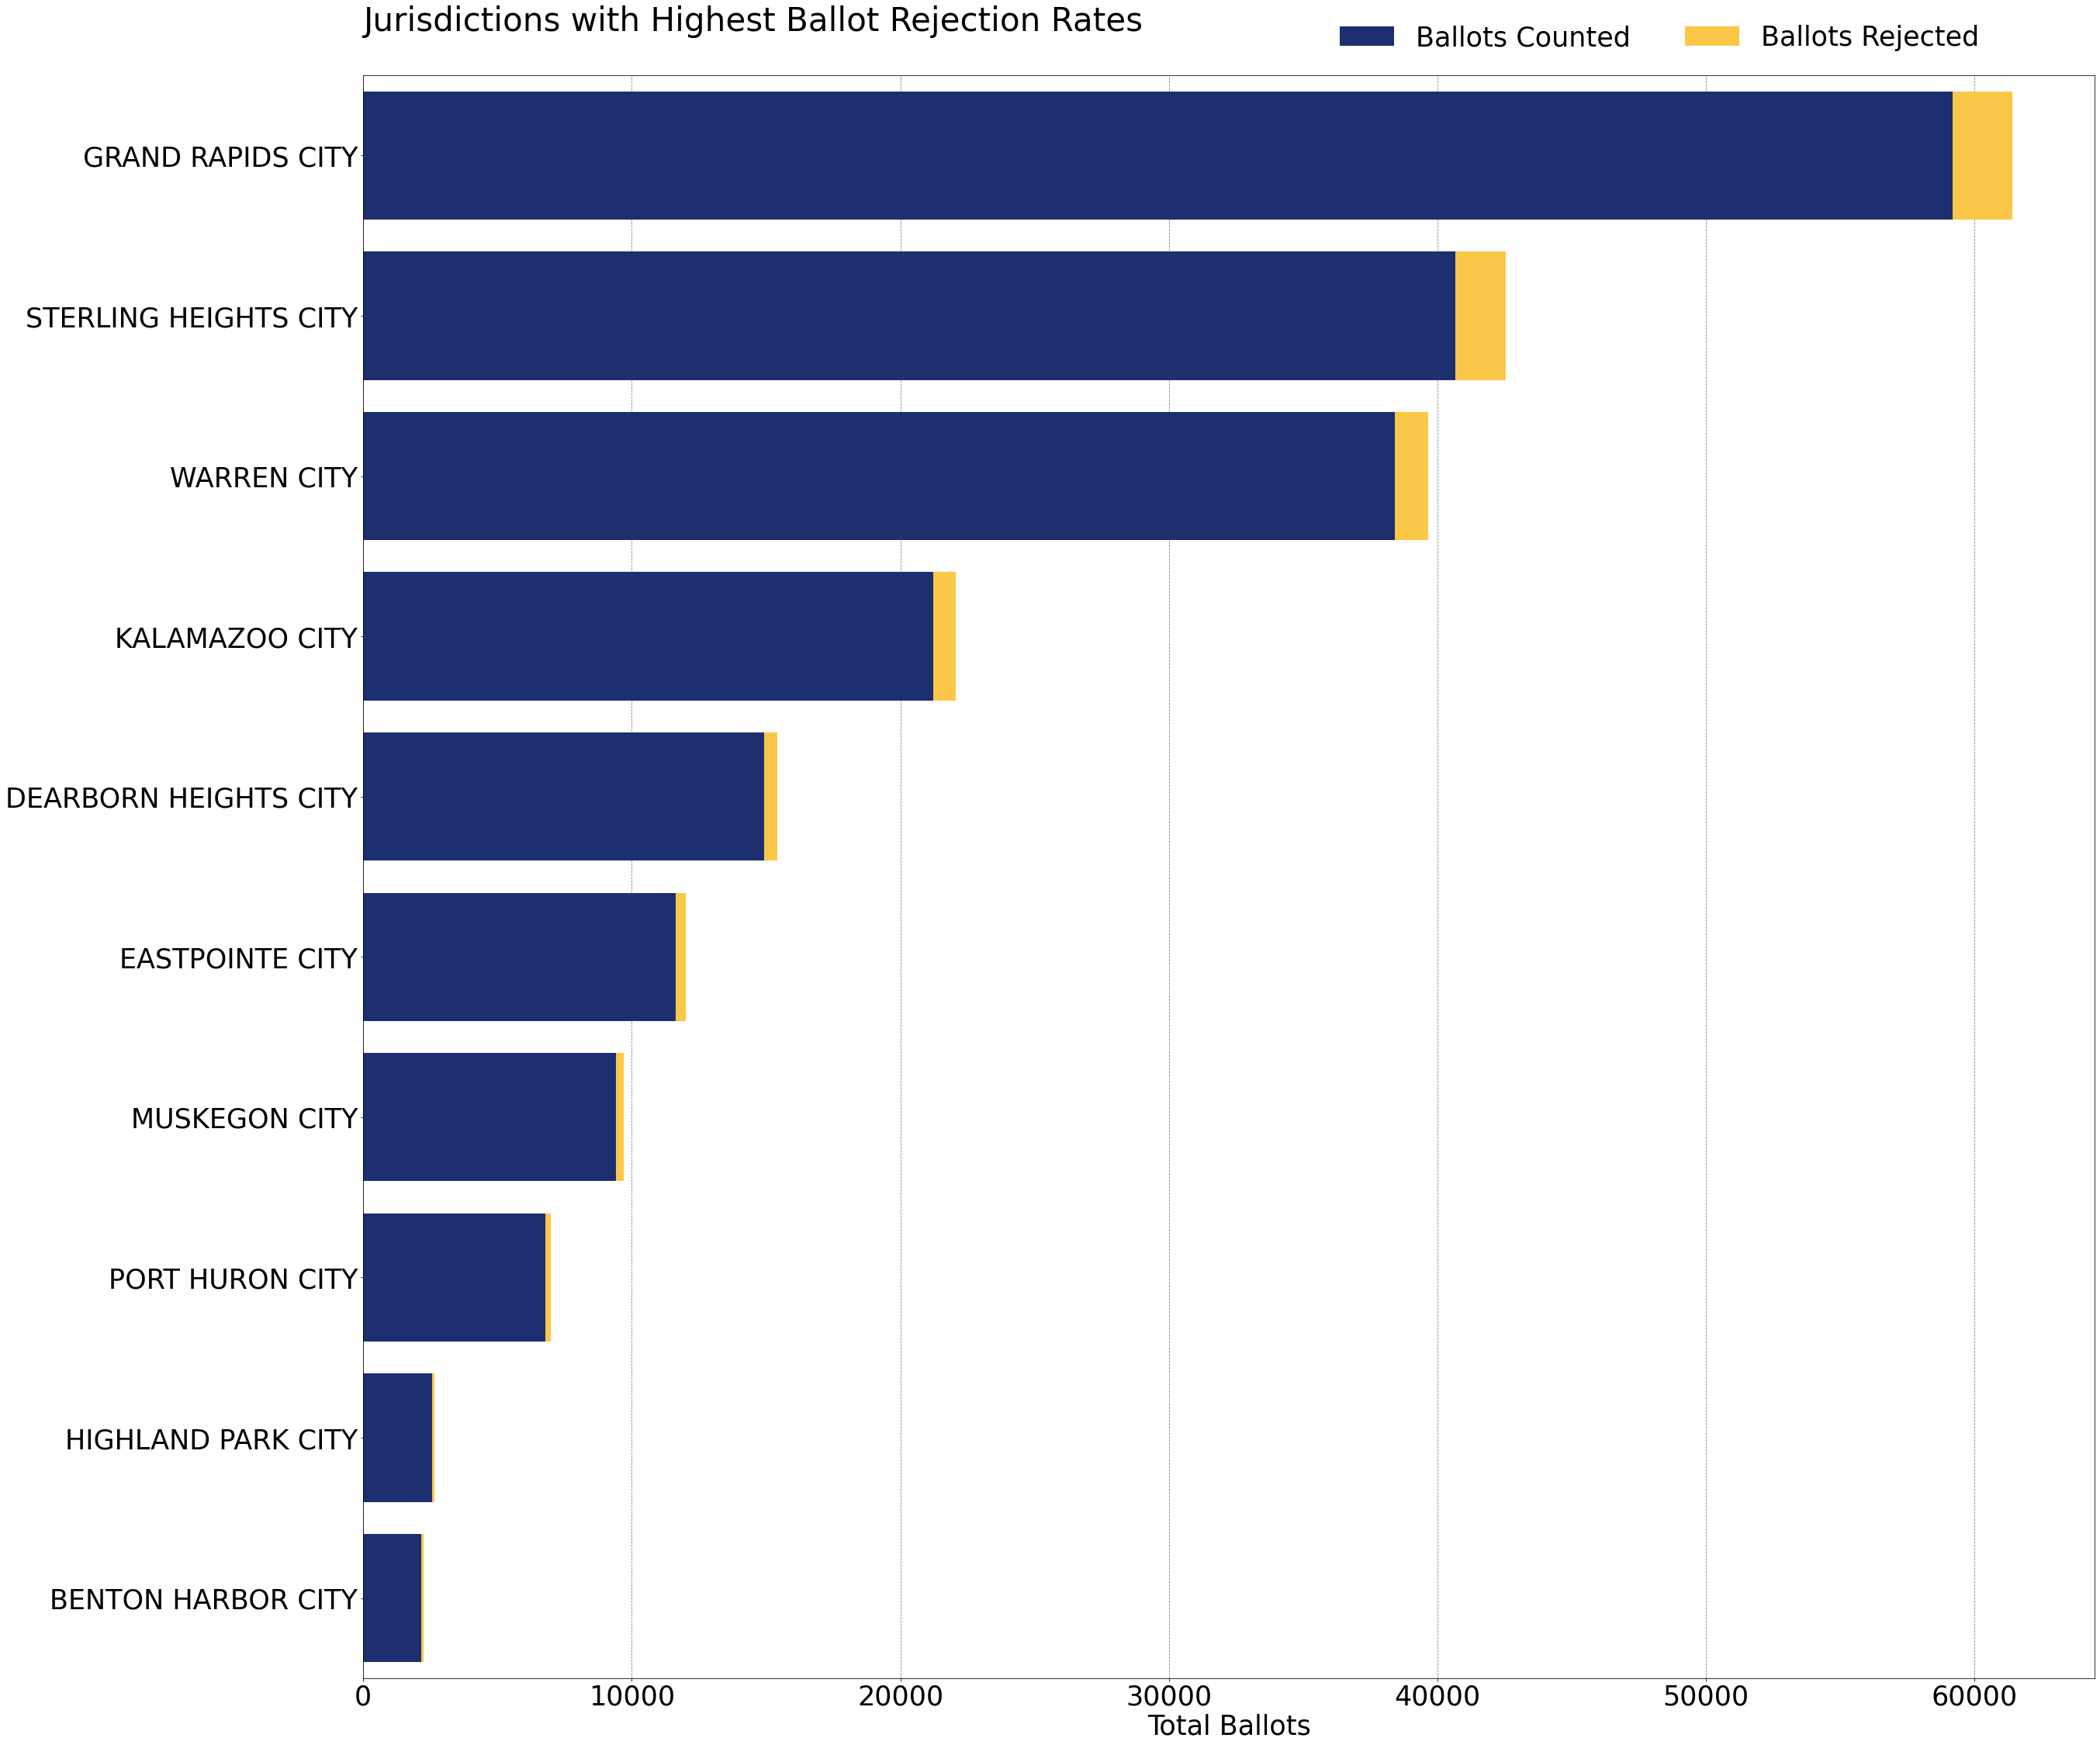

In [96]:
fields2 = ['BALLOTS TABULATED','TOTAL BALLOTS REJECTED']
colors = ['#1D2F6F', '#FAC748']
labels = ['Ballots Counted','Ballots Rejected']

plt.rc('font', size=35) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(40,38))
#plot bars
left = len(chart2) * [0]
for idx, name in enumerate(fields2): 
    plt.barh(chart2.index, chart2[name], left=left, color=colors[idx])
    left = left + chart2[name]
#title, legend, labels
plt.title('Jurisdictions with Highest Ballot Rejection Rates\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Total Ballots')
#remove spines
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

In [73]:
chart3= top10rates[['JURISDICTION','REJECTED RATE', 'SIG ISSUE RATE','BALLOT LATE RATE','ID NOT CONF RATE','ENV EMPTY RATE','OTHER RATE']].set_index('JURISDICTION')

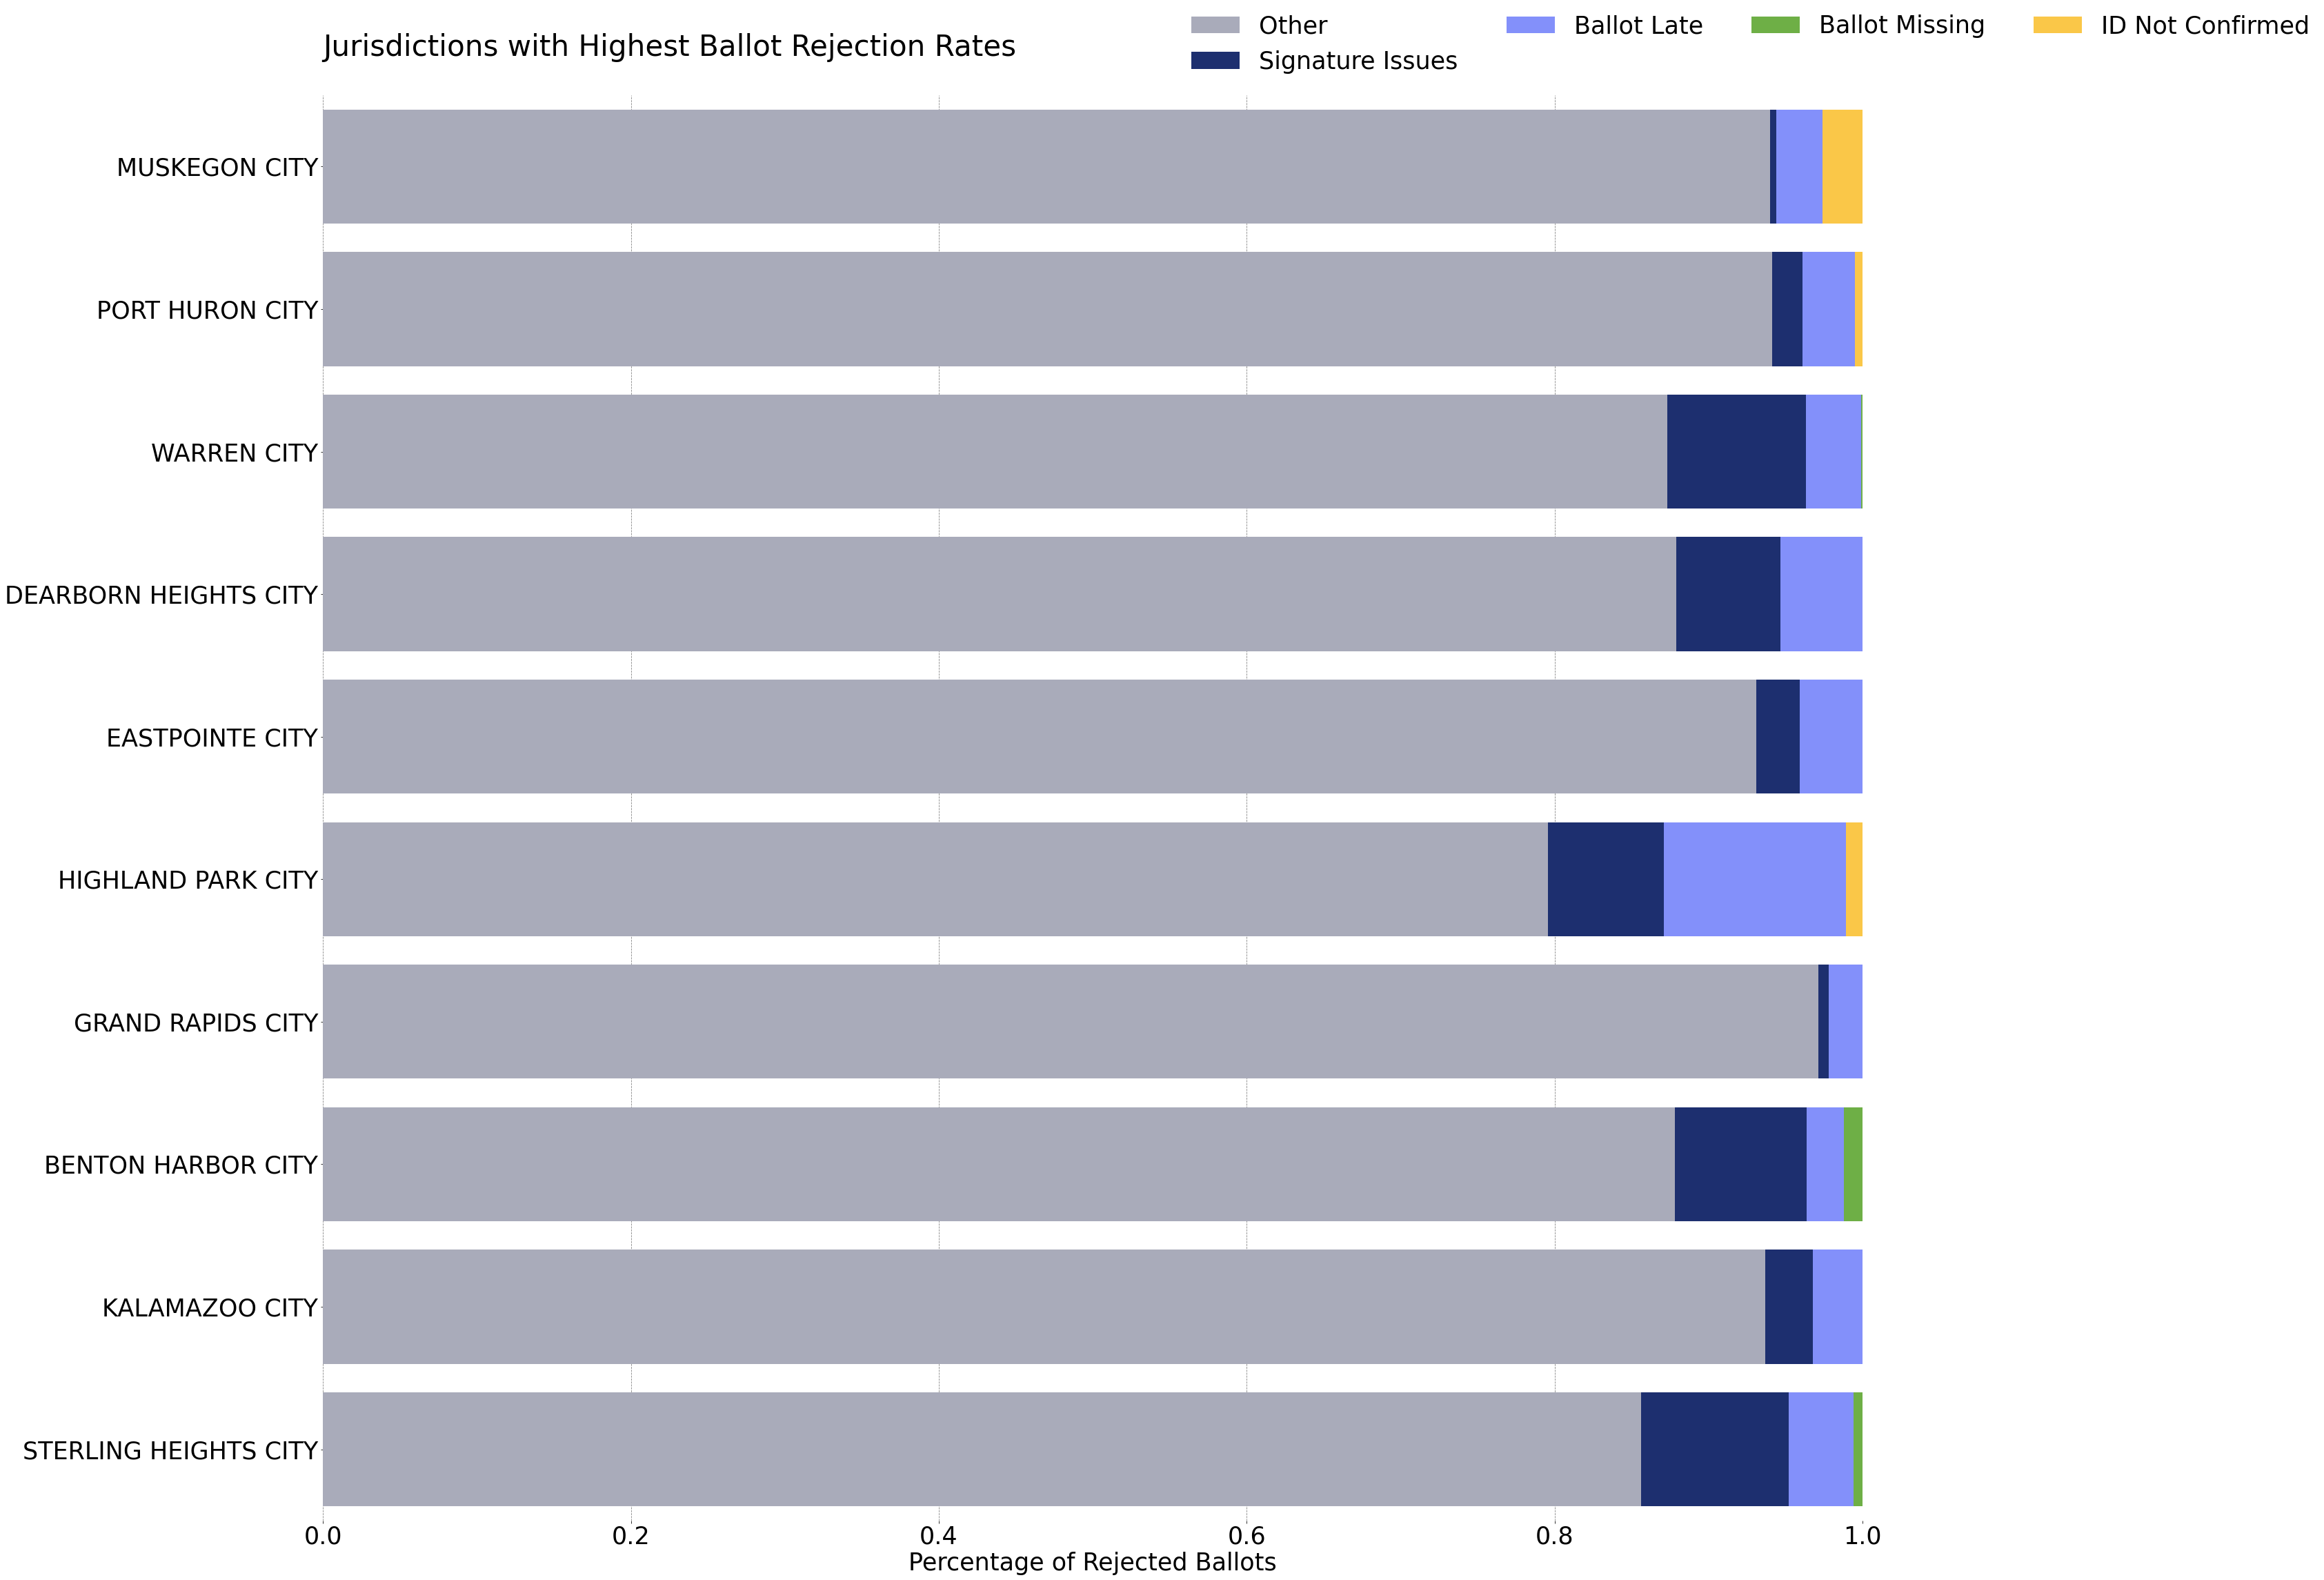

In [74]:
fields3 = ['OTHER RATE','SIG ISSUE RATE', 'BALLOT LATE RATE','ENV EMPTY RATE','ID NOT CONF RATE']
colors = ['#A9ABBA','#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['Other','Signature Issues','Ballot Late','Ballot Missing','ID Not Confirmed']

plt.rc('font', size=35) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(40,38))
#plot bars
left = len(chart3) * [0]
for idx, name in enumerate(fields3): 
    plt.barh(chart3.index, chart3[name], left=left, color=colors[idx])
    left = left + chart2[name]
#title, legend, labels
plt.title('Jurisdictions with Highest Ballot Rejection Rates\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Percentage of Rejected Ballots')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()